In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [0]:
df = pd.read_csv("featured.csv")

Target - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

In [0]:
y = df.target
X = df.drop(['target'], axis = 1)

In [0]:
y.unique()

array([0., 1.])

In [0]:
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [0]:
#y

In [0]:
# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split ( X,y,test_size = 0.3,random_state=101)

ANN Model

In [0]:
# Artificial Neural Network Model

annmodel = Sequential()
# input layer
annmodel.add(Dense(30, input_dim=7, activation='tanh'))
# hidden layer
annmodel.add(Dense(15, activation='tanh'))
# hidden layer
annmodel.add(Dense(5, activation='tanh'))

# output layer
annmodel.add(Dense(1,activation='sigmoid'))

In [0]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [0]:
annmodel.compile(optimizer= opt , loss='binary_crossentropy', metrics= 'accuracy')

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#Fit Model
annmodel.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, callbacks=[early_stop], verbose=0)

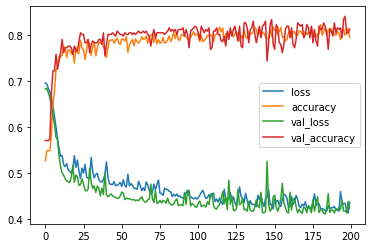

In [0]:
losses = pd.DataFrame(annmodel.history.history)
losses.plot()

In [0]:
metrics = pd.DataFrame(annmodel.history.history)

In [0]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.695867,0.526398,0.682684,0.570397
1,0.693321,0.548137,0.684009,0.570397
2,0.683990,0.548137,0.674394,0.570397
3,0.675979,0.548137,0.663222,0.574007
4,0.664599,0.583851,0.644627,0.675090
...,...,...,...,...
195,0.432639,0.813665,0.416974,0.833935
196,0.433793,0.799689,0.417844,0.841155
197,0.418707,0.804348,0.412902,0.805054
198,0.412336,0.815217,0.437745,0.805054


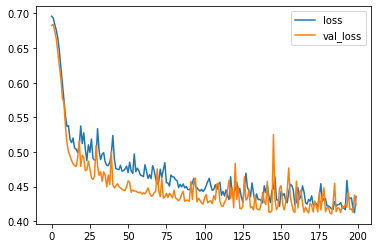

In [0]:
metrics[['loss','val_loss']].plot()

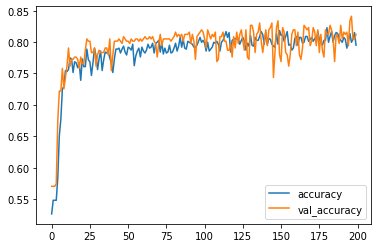

In [0]:
metrics[['accuracy','val_accuracy']].plot()

In [0]:
annmodel.evaluate(X_test,y_test,verbose=0)

[0.4235270023345947, 0.8122743964195251]

In [0]:
annmodel.summary()
score = annmodel.evaluate(X_test,y_test, verbose=0)
print('Model Accuracy = ',score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 791
Trainable params: 791
Non-trainable params: 0
_________________________________________________________________
Model Accuracy =  0.8122743964195251


In [0]:
#Run the model with test n train data.. 

In [0]:
# Artificial Neural Network Model
annmodel = Sequential()
# input layer
annmodel.add(Dense(30, input_dim=7, activation='tanh'))
# hidden layer
annmodel.add(Dense(15, activation='tanh'))
# hidden layer
annmodel.add(Dense(5, activation='tanh'))
# output layer
annmodel.add(Dense(1,activation='sigmoid'))

In [0]:
opt = keras.optimizers.Adam(learning_rate=0.001)
annmodel.compile(optimizer= opt , loss='binary_crossentropy', metrics= 'accuracy')

In [0]:
#Fit Model
annmodel.fit( X , y, epochs=200, verbose=0)

Saving Model + Scaler

In [0]:
import joblib

In [0]:
joblib.dump(scaler,'scaler.pkl')

['heart_data_scaler.pkl']

In [0]:
annmodel.save("model.h5")

End of Checkpoint 4